# Practice PS07: Outlier analysis

Author: <font color="blue">Miguel Rando Ramirez</font>

E-mail: <font color="blue">miguel.rando01@estudiant.upf.edu</font>

Date: <font color="blue">21/11/24</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [3]:
# LEAVE AS-IS

df = pd.read_csv('annthyroid.csv', sep=',')

# Replace the "label" column by an "abnormal" column
df['result'] = df['label'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['label'], inplace=True)

<font size="+1" color="red">Replace this cell with your code to print the number and percentages of patients in each group.</font>

In [4]:
total_patients = len(df)

# Calculate the number and percentage of normal thyroids
normal_count = df[df['result'] == 'normal'].shape[0]
normal_percentage = (normal_count / total_patients) * 100

# Calculate the number and percentage of abnormal thyroids
abnormal_count = df[df['result'] == 'abnormal'].shape[0]
abnormal_percentage = (abnormal_count / total_patients) * 100

print(f"Total patients   : {total_patients}")
print(f"Normal thyroid   : {normal_count} ({normal_percentage:.2f}%)")
print(f"Abnormal thyroid : {abnormal_count} ({abnormal_percentage:.2f}%)")

Total patients   : 7200
Normal thyroid   : 6666 (92.58%)
Abnormal thyroid : 534 (7.42%)


<font size="+1" color="red">Replace this cell with your code to print the 10 normal exams and the centroid of all normal exams, and the first 10 abnormal exams and the centroid of all abnormal exams.</font>

In [5]:
normal = df[df['result'] == 'normal']

print('first 10 normal exams \n')
print(normal.head(10))

print('\n mean of a normal exam \n')
print(normal.mean())


abnormal = df[df['result'] == 'abnormal']

print('\n first 10 abnormal exams \n')
print(abnormal.head(10))

print('\n mean of abnormal exam \n')
print(abnormal.mean())

first 10 normal exams 

     f1       f2     f3     f4     f5     f6  result
0  0.73  0.00060  0.015  0.120  0.082  0.146  normal
1  0.24  0.00025  0.030  0.143  0.133  0.108  normal
2  0.47  0.00190  0.024  0.102  0.131  0.078  normal
3  0.64  0.00090  0.017  0.077  0.090  0.085  normal
4  0.23  0.00025  0.026  0.139  0.090  0.153  normal
5  0.69  0.00025  0.016  0.086  0.070  0.123  normal
6  0.85  0.00025  0.023  0.128  0.104  0.121  normal
7  0.48  0.00208  0.020  0.086  0.078  0.110  normal
8  0.67  0.00130  0.024  0.087  0.109  0.080  normal
9  0.76  0.00010  0.029  0.124  0.128  0.097  normal

 mean of a normal exam 

f1    0.518314
f2    0.002098
f3    0.020384
f4    0.112193
f5    0.097705
f6    0.116132
dtype: float64

 first 10 abnormal exams 

       f1       f2      f3      f4     f5      f6    result
10   0.62  0.01100  0.0080  0.0730  0.074  0.0980  abnormal
19   0.50  0.06100  0.0096  0.0130  0.116  0.0110  abnormal
27   0.78  0.02500  0.0090  0.0500  0.084  0.0600  abn

<font size="+1" color="red">Replace this cell with a brief comment indicating, based only on the centroids, which features do you think could be useful for differentiating between normal and abnormal thyroids? Why?</font>

I would say that the big difference is in f2, f4 and f6. Bigger values of f2 and lower values of f4 and f6 will suggest that we have an abnormal thyroid.


<font size="+1" color="red">Replace this cell with your code to create a scatter matrix as described above.</font>

array([[<AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>,
        <AxesSubplot:xlabel='f3', ylabel='f1'>,
        <AxesSubplot:xlabel='f4', ylabel='f1'>,
        <AxesSubplot:xlabel='f5', ylabel='f1'>,
        <AxesSubplot:xlabel='f6', ylabel='f1'>],
       [<AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>,
        <AxesSubplot:xlabel='f3', ylabel='f2'>,
        <AxesSubplot:xlabel='f4', ylabel='f2'>,
        <AxesSubplot:xlabel='f5', ylabel='f2'>,
        <AxesSubplot:xlabel='f6', ylabel='f2'>],
       [<AxesSubplot:xlabel='f1', ylabel='f3'>,
        <AxesSubplot:xlabel='f2', ylabel='f3'>,
        <AxesSubplot:xlabel='f3', ylabel='f3'>,
        <AxesSubplot:xlabel='f4', ylabel='f3'>,
        <AxesSubplot:xlabel='f5', ylabel='f3'>,
        <AxesSubplot:xlabel='f6', ylabel='f3'>],
       [<AxesSubplot:xlabel='f1', ylabel='f4'>,
        <AxesSubplot:xlabel='f2', ylabel='f4'>,
        <AxesSubplot:xlabel='f3', yla

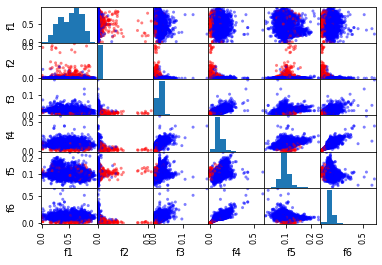

In [6]:
color_code = {'abnormal': 'red', 'normal': 'blue'}

colors = df['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(df, c=colors)


<font size="+1" color="red">Replace this cell with a brief commentary on whether you already guess any difference between normal and abnormal exams, based on combinations of features. What are the differences you can appreciate?</font>

There is a noticeable difference between normal and abnormal exams. Abnormal exams often have outlier behavior, with values deviating significantly from the norm.

# 1. Create isolation tree

## 1.1. Random dimension and random split

<font size="+1" color="red">Replace this cell with code implementing "pick_random_dimension" and a couple of calls to this function.</font>

In [7]:
def pick_random_dimension(df, columns_to_ignore):
    
    columns = []
    
    for col in df.columns:
    
        if col not in columns_to_ignore:
            
            columns.append(col)
            
    return random.choice(columns)
    
    

In [8]:
prueba_1 = ['f1', 'f2', 'id']

pick_random_dimension(df, prueba_1)



'f6'

In [9]:
prueba_2 = ['result', 'id']

pick_random_dimension(df, prueba_2)

'f5'

<font size="+1" color="red">Replace this cell with code implementing "pick_random_split" and a couple of calls to test this function; each call should return a random split point chosen uniformly at random between the minimum and the maximum value along a dimension.</font>

In [10]:
def pick_random_split(df, dimension):
   
    min_value = np.min(df[dimension])
    max_value = np.max(df[dimension])
    
    # generate random split
    return random.uniform(min_value, max_value)

In [11]:
split_point_f1 = pick_random_split(df, 'f1')
print(split_point_f1)

0.7733206230374219


In [12]:
split_point_f2 = pick_random_split(df, 'f2')
print(split_point_f2)


0.10526782235542087


## 1.2. Implement split data into two

<font size="+1" color="red">Replace this cell with code implementing "split_dataset".</font>

In [13]:
def split_dataset(df, dimension, split):
    
    lower = df[df[dimension] <= split]
    
    greater = df[df[dimension] > split]
    
    return lower, greater

<font size="+1" color="red">Replace this cell with code testing "split_dataset", i.e., select a dimension and a cut-off and split the dataset, then print the two pieces and check that it is working correctly. Also check that the sum of the sizes of the two pieces is the size of the original data.</font>

In [14]:
(left, right) = split_dataset(df, 'f1', 0.5)

print("Sub-dataset where 'f1' <= 0.5:")
print(left)

print("\nSub-dataset where 'f1' > 0.5:")
print(right)

Sub-dataset where 'f1' <= 0.5:
        f1       f2      f3       f4     f5       f6  result
1     0.24  0.00025  0.0300  0.14300  0.133  0.10800  normal
2     0.47  0.00190  0.0240  0.10200  0.131  0.07800  normal
4     0.23  0.00025  0.0260  0.13900  0.090  0.15300  normal
7     0.48  0.00208  0.0200  0.08600  0.078  0.11000  normal
11    0.18  0.00010  0.0230  0.09800  0.085  0.11500  normal
...    ...      ...     ...      ...    ...      ...     ...
7171  0.46  0.00170  0.0201  0.13500  0.104  0.12900  normal
7179  0.33  0.00230  0.0201  0.07700  0.083  0.09300  normal
7180  0.30  0.00170  0.0230  0.08300  0.081  0.10200  normal
7192  0.45  0.00077  0.0201  0.11329  0.096  0.11776  normal
7198  0.35  0.00280  0.0201  0.09000  0.089  0.10100  normal

[3169 rows x 7 columns]

Sub-dataset where 'f1' > 0.5:
        f1       f2      f3     f4     f5      f6    result
0     0.73  0.00060  0.0150  0.120  0.082  0.1460    normal
3     0.64  0.00090  0.0170  0.077  0.090  0.0850    normal
5

## 1.3. Create one isolation tree

In [15]:
# LEAVE AS-IS

dfi = df.copy()
dfi.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(df))])
dfi

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
1,P0002,0.24,0.00025,0.0300,0.143,0.133,0.1080,normal
2,P0003,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,P0004,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
4,P0005,0.23,0.00025,0.0260,0.139,0.090,0.1530,normal
...,...,...,...,...,...,...,...,...
7195,P7196,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,P7197,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,P7198,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal
7198,P7199,0.35,0.00280,0.0201,0.090,0.089,0.1010,normal


<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [16]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        # REPLACE WITH YOUR CODE 
        # select the dimension
        dimension = pick_random_dimension(data, columns_to_ignore)

        # select a random split point for the chosen dimension
        split = pick_random_split(data, dimension)
        
        # set left and right
        left_data, right_data = split_dataset(data, dimension, split)
        
        # recursively
        tree["left"] = isolation_tree(left_data, columns_to_ignore, min_items)
        tree["right"] = isolation_tree(right_data, columns_to_ignore, min_items)

        # store split details at the current node
        tree["dimension"] = dimension
        tree["split"] = split

        return tree   

In [17]:
# LEAVE AS-IS

mytree = isolation_tree(dfi, ['id', 'result'], 2000)

In [18]:
# LEAVE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [19]:
print(tree_to_nodes(mytree))

:'internal node: f6 <= 0.40'
-<:'internal node: f6 <= 0.20'
--<:'internal node: f1 <= 0.22'
---<:'external node: 384 normal + 31 abnormal'
--->:'internal node: f4 <= 0.28'
----<:'internal node: f1 <= 0.44'
-----<:'internal node: f5 <= 0.19'
------<:'internal node: f6 <= 0.19'
-------<:'internal node: f6 <= 0.16'
--------<:'internal node: f2 <= 0.39'
---------<:'internal node: f3 <= 0.06'
----------<:'internal node: f2 <= 0.09'
-----------<:'internal node: f5 <= 0.19'
------------<:'external node: 1896 normal + 104 abnormal'
------------>:'external node: 3 normal + 0 abnormal'
----------->:'external node: 1 normal + 12 abnormal'
---------->:'external node: 3 normal + 0 abnormal'
--------->:'external node: 0 normal + 3 abnormal'
-------->:'external node: 62 normal + 0 abnormal'
------->:'external node: 9 normal + 0 abnormal'
------>:'external node: 11 normal + 0 abnormal'
----->:'internal node: f2 <= 0.14'
------<:'internal node: f3 <= 0.01'
-------<:'external node: 756 normal + 156 abno

<font size="+1" color="red">Replace this cell with you code implementing `get_max_tree_depth`</font>

In [20]:
def get_max_tree_depth(tree):

    left_depth = get_max_tree_depth(tree["left"]) if "left" in tree else 0
    right_depth = get_max_tree_depth(tree["right"]) if "right" in tree else 0

    # Add 1 for the current node
    return 1 + max(left_depth, right_depth)

<font size="+1" color="red">Replace this cell with you code testing `get_max_tree_depth` on `mytree`.</font>

In [23]:
get_max_tree_depth(mytree)

13

## 2.1. Create an isolation forest

<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [ ]:
def isolation_forest(dfi, columns_to_ignore, min_items, num_trees):
    
    forest = []
    
    for i in range(num_trees):
        tree = isolation_tree(dfi, columns_to_ignore, min_items)
        forest.append(tree)
        
    return forest

In [26]:
# MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES

min_items = 50
num_trees = 20

In [27]:
# LEAVE AS-IS

myforest = isolation_forest(dfi, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [28]:
# LEAVE AS-IS

for i in range(0, 2):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f3 <= 0.11'
-<:'internal node: f1 <= 0.13'
--<:'external node: 41 normal + 9 abnormal'
-->:'internal node: f4 <= 0.36'
---<:'internal node: f2 <= 0.31'
----<:'internal node: f1 <= 0.26'
-----<:'internal node: f2 <= 0.11'
------<:'internal node: f6 <= 0.30'
-------<:'internal node: f5 <= 0.12'
--------<:'internal node: f1 <= 0.16'
---------<:'internal node: f2 <= 0.00'
----------<:'internal node: f4 <= 0.12'
-----------<:'internal node: f4 <= 0.08'
------------<:'external node: 5 normal + 0 abnormal'
------------>:'internal node: f1 <= 0.13'
-------------<:'external node: 12 normal + 0 abnormal'
------------->:'external node: 40 normal + 0 abnormal'
----------->:'external node: 9 normal + 0 abnormal'
---------->:'external node: 4 normal + 0 abnormal'
--------->:'internal node: f4 <= 0.07'
----------<:'external node: 32 normal + 4 abnormal'
---------->:'internal node: f3 <= 0.04'
-----------<:'internal node: f6 <= 0.17'
------------<:'internal node: f2 <= 0

:'internal node: f6 <= 0.56'
-<:'internal node: f3 <= 0.02'
--<:'internal node: f4 <= 0.43'
---<:'internal node: f6 <= 0.30'
----<:'internal node: f2 <= 0.30'
-----<:'internal node: f3 <= 0.02'
------<:'internal node: f3 <= 0.00'
-------<:'external node: 11 normal + 3 abnormal'
------->:'internal node: f1 <= 0.82'
--------<:'internal node: f6 <= 0.13'
---------<:'internal node: f3 <= 0.01'
----------<:'internal node: f2 <= 0.01'
-----------<:'internal node: f1 <= 0.46'
------------<:'internal node: f5 <= 0.09'
-------------<:'external node: 24 normal + 2 abnormal'
------------->:'external node: 43 normal + 4 abnormal'
------------>:'internal node: f3 <= 0.01'
-------------<:'external node: 43 normal + 5 abnormal'
------------->:'internal node: f2 <= 0.01'
--------------<:'internal node: f4 <= 0.10'
---------------<:'internal node: f1 <= 0.66'
----------------<:'internal node: f1 <= 0.58'
-----------------<:'external node: 24 normal + 1 abnormal'
----------------->:'external node: 37 no

## 2.2. Find the average depth of an item

In [29]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [30]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(dfi, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(dfi, 5, myforest[0])
print()


On shallow tree, having maximum depth 13
Depths for normal items
- id=P5065 is at depth 12/13
- id=P5263 is at depth 8/13
- id=P6012 is at depth 8/13
- id=P2505 is at depth 8/13
- id=P1376 is at depth 3/13
Depths for abnormal items
- id=P2207 is at depth 12/13
- id=P1524 is at depth 8/13
- id=P2693 is at depth 7/13
- id=P5281 is at depth 8/13
- id=P4055 is at depth 12/13

On first tree of forest, having maximum depth 36
Depths for normal items
- id=P1028 is at depth 23/36
- id=P1668 is at depth 25/36
- id=P5284 is at depth 18/36
- id=P3782 is at depth 15/36
- id=P6099 is at depth 23/36
Depths for abnormal items
- id=P6718 is at depth 10/36
- id=P3207 is at depth 20/36
- id=P4094 is at depth 24/36
- id=P6482 is at depth 24/36
- id=P2775 is at depth 4/36



<font size="+1" color="red">Replace this cell with a brief commentary on these depths.</font>

The depths of both "normal" and "abnormal" items are generally higher in the shallow tree compared to the first tree of the forest. This is expected because the shallow tree has fewer opportunities to create splits that quickly isolate outliers. In contrast, the forest's tree, with a maximum depth of 36, isolates some points (particularly outliers) more efficiently at lower depths.

This is the trade-off between tree depth and isolation precision.








<font size="+1" color="red">Replace this cell with you code implementing "find_average_depth".</font>

In [31]:
def find_average_depth(forest, column_name, value):
    
    total_depth = 0
    
    for tree in forest:
        total_depth += find_element_depth(tree, column_name, value)
    
    average = total_depth / len(forest)
    
    return average

In [32]:
# LEAVE AS-IS

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(dfi[dfi['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=P4560 is at average depth 24.8
- id=P4935 is at average depth 17.4
- id=P0738 is at average depth 24.0
- id=P1653 is at average depth 26.3
- id=P6000 is at average depth 20.4

Average depths for abnormal items
- id=P2340 is at average depth 12.1
- id=P4008 is at average depth 8.6
- id=P6742 is at average depth 17.0
- id=P5356 is at average depth 17.6
- id=P1834 is at average depth 17.8



<font size="+1" color="red">Replace this cell with a brief commentary indicating how would you make the "find_average_depth" function more efficient if you wanted to obtain the average depth of **all** elements. Be concise but be precise, providing pseudocode if you consider it clearer than a text explanation.</font>

I think that a way of doing this in a more efficient way would be going through the tree only once. Then,  we could compute the depths for all the elements at the same time.

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [33]:
# LEAVE AS-IS

abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'].sample(30))
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'].sample(30))

print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P1237', 'P6593', 'P3822', 'P6765', 'P4108', 'P2390', 'P3711', 'P6059', 'P4794', 'P2096', 'P6580', 'P1923', 'P5860', 'P6349', 'P2450', 'P6212', 'P0396', 'P0832', 'P4114', 'P6556', 'P4011', 'P4360', 'P1604', 'P7093', 'P2620', 'P4671', 'P2011', 'P2675', 'P7044', 'P0653']
Abnormal point sample ids : ['P0520', 'P4982', 'P0259', 'P1583', 'P5190', 'P3048', 'P6574', 'P2922', 'P4480', 'P3940', 'P6669', 'P0943', 'P1740', 'P3513', 'P4339', 'P5264', 'P5957', 'P7059', 'P0936', 'P3098', 'P4377', 'P5605', 'P4614', 'P2210', 'P5074', 'P3729', 'P4998', 'P2172', 'P5000', 'P5909']


In [34]:
# LEAVE AS-IS

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P1237 is at average depth 16.65
 element id=P6593 is at average depth 16.25
 element id=P3822 is at average depth 16.70
 element id=P6765 is at average depth 18.75
 element id=P4108 is at average depth 18.10
 element id=P2390 is at average depth 21.25
 element id=P3711 is at average depth 23.10
 element id=P6059 is at average depth 26.20
 element id=P4794 is at average depth 24.35
 element id=P2096 is at average depth 17.40
 element id=P6580 is at average depth 24.90
 element id=P1923 is at average depth 24.50
 element id=P5860 is at average depth 16.35
 element id=P6349 is at average depth 22.60
 element id=P2450 is at average depth 25.90
 element id=P6212 is at average depth 18.80
 element id=P0396 is at average depth 18.60
 element id=P0832 is at average depth 25.60
 element id=P4114 is at average depth 21.00
 element id=P6556 is at average depth 25.90
 element id=P4011 is at average depth 20.20
 element id=P4360 is at average dept

In [35]:
# LEAVE AS-IS

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P0520 is at average depth 15.35
 element id=P4982 is at average depth 16.30
 element id=P0259 is at average depth 18.90
 element id=P1583 is at average depth 18.50
 element id=P5190 is at average depth 18.95
 element id=P3048 is at average depth 16.70
 element id=P6574 is at average depth 22.35
 element id=P2922 is at average depth 21.75
 element id=P4480 is at average depth 8.50
 element id=P3940 is at average depth 7.35
 element id=P6669 is at average depth 18.75
 element id=P0943 is at average depth 21.95
 element id=P1740 is at average depth 17.80
 element id=P3513 is at average depth 9.50
 element id=P4339 is at average depth 23.25
 element id=P5264 is at average depth 23.40
 element id=P5957 is at average depth 9.95
 element id=P7059 is at average depth 5.55
 element id=P0936 is at average depth 16.35
 element id=P3098 is at average depth 14.10
 element id=P4377 is at average depth 20.30
 element id=P5605 is at average depth 2

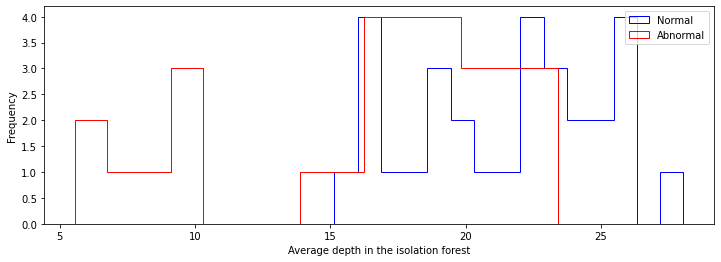

In [36]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=15, density=False, histtype='step', color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=15, density=False, histtype='step', color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

The graph shows that abnormal items are more easily distinguishable by the isolation forest, whereas normal items tend to be more similar to each other and require deeper isolation to separate.

## 3.2. Compute outlier scores and conclude

In [37]:
# LEAVE AS-IS

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [38]:
# LEAVE AS-IS

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

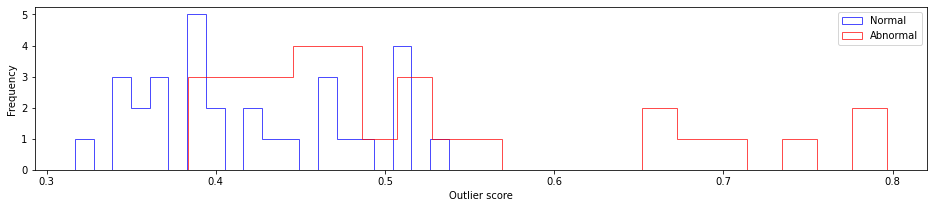

In [39]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, histtype='step', color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, histtype='step', color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

We can see that abnormal points tends to have higher outlier score. This means that outliers are most likely to be abnormal tests.

<font size="+1" color="red">Replace this cell with your code to determine an optimal threshold.</font>

In [48]:
def accuracy_score(labels, predictions):
    
    # contamos el numero de predicciones correctas
    correct = sum([1 for true, pred in zip(labels, predictions) if true == pred])
    
    # calculamos la precision 
    accuracy = correct / len(labels)
    
    return accuracy

In [68]:
def outlier_threshold(normal_scores, abnormal_scores):
    
    # we put all the scores together
    all_scores = normal_scores + abnormal_scores
    
    # we put the labels to the scores
    labels = [0] * len(normal_scores) + [1] * len(abnormal_scores)
    
    low, high = 0.0, 1.0
    
    best_threshold = 0
    best_accuracy = 0
    
    tolerance = 0.001
    
    # we do a binary search
    while high - low > tolerance:
        # we calculate the mid point
        mid = (low + high) / 2
        
        # we do the predictions
        predictions = [1 if score > mid else 0 for score in all_scores]
        
        # Calculamos la precisión
        accuracy = accuracy_score(labels, predictions)
        print(mid, accuracy)
        
        # we update the threshold if we get better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = mid
        
        # adjust the range
        if accuracy < best_accuracy:
            high = mid
        else:
            low = mid
    
    print('\n The threshold is ', best_threshold, 'with accuracy ',best_accuracy)

<font size="+1" color="red">Replace this cell with your evaluation of the optimal threshold.</font>

In [69]:
outlier_threshold(normal_scores, abnormal_scores)

0.5 0.6333333333333333
0.75 0.5333333333333333
0.625 0.6166666666666667
0.5625 0.6166666666666667
0.53125 0.6333333333333333
0.546875 0.6333333333333333
0.5546875 0.6333333333333333
0.55859375 0.6333333333333333
0.560546875 0.6333333333333333
0.5615234375 0.6166666666666667

 The threshold is  0.5 with accuracy  0.6333333333333333


we can see that there are more thresholds that have the same accuracy, but we get the first one 0.5. Also the others are nearby points from 0.5 to 0.56.

In [79]:
def evaluate_threshold(normal_scores, abnormal_scores, threshold):
    
    # same than before
    all_scores = normal_scores + abnormal_scores
    labels = [0] * len(normal_scores) + [1] * len(abnormal_scores)
    predictions = [1 if score > threshold else 0 for score in all_scores]
    
    # normal thyroids predicted as abnormal
    FP = sum(1 for i in range(len(normal_scores)) if predictions[i] == 1) 
    
    # abnormal thyroids predicted as normal
    FN = sum(1 for i in range(len(normal_scores), len(all_scores)) if predictions[i] == 0)  
    
    # we calculate the rates
    FPR = FP / len(normal_scores)  
    FNR = FN / len(abnormal_scores)
    
    print('False positive rate: ', FPR, '\nFalse negative rate: ', FNR) 

In [80]:
threshold = 0.5
evaluate_threshold(normal_scores, abnormal_scores, threshold)

False positive rate:  0.16666666666666666 
False negative rate:  0.5666666666666667


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>